In [74]:
import numpy as np
import pygimli as pg

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
Mesh: Nodes: 132 Cells: 110 Boundaries: 241 secNodes: 1205


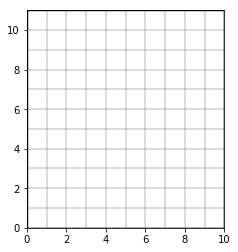

In [75]:
x = np.arange(10.1)  # 0 1 .. 10
y = np.arange(11.1)  # 0 1 .. 11
print(x)
print(y)
grid = pg.createGrid(x, y)
grid.createSecondaryNodes(5)  # for accuracy
print(grid)
pg.show(grid);

In [76]:
x1 = 0  # borehole 1
x2 = 10  # borehole 2
sy = np.arange(1, 10.1)  # sensor positions
data = pg.DataContainer()
data.registerSensorIndex("s")  # Integer/Index
data.registerSensorIndex("g")  # Integer/Index
[data.createSensor([x1, yi]) for yi in sy] # left
[data.createSensor([x2, yi]) for yi in sy] # right
one = np.ones_like(sy, dtype=int) # 1 1 1 
up = np.arange(len(sy)) # 1 2 .. 10
shot = []
geop = []
for i in range(len(sy)):
    shot.extend(one * i)
    geop.extend(up+len(sy))

data.resize(len(shot))
data.set("s", np.array(shot))
data.set("g", np.array(geop))
print(data)
data.markValid(data("g") >= 0)
data.save("data.shm")

Data: Sensors: 20 data: 100, nonzero entries: ['g', 's']


1

25/05/20 - 06:33:55 - pyGIMLi - INFO - Creating refined mesh (secnodes: 4) to solve forward task.
25/05/20 - 06:33:55 - pyGIMLi - WARNING - Mesh already contains secondary nodes. Not adding any more.


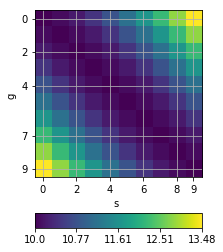

In [77]:
# with the manager
tt = pg.physics.TravelTimeManager()
data = tt.simulate(mesh=grid, scheme=data, slowness=slowness,
                   secNodes=4) # , noiseLevel=0.001, noiseAbs=1e-5)
data.save("data.dat", "s g t")
pg.viewer.mpl.showDataContainerAsMatrix(data, "s", "g", "t");

In [81]:
tt.invert(data, mesh=grid, maxIter=1, startModel=slowness);

25/05/20 - 06:34:37 - pyGIMLi - INFO - Found 1 regions.
25/05/20 - 06:34:38 - pyGIMLi - ERROR - <class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>._ensureError(C:\Users\halbm\AppData\Roaming\Python\Python37\site-packages\pygimli-1.1.0+2.g6890f54c-py3.7.egg\pygimli\frameworks\methodManager.py:339)
DataContainer has no "err" values. Fallback set to 3%
25/05/20 - 06:34:38 - pyGIMLi - INFO - Creating forward mesh from region infos.
25/05/20 - 06:34:38 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
25/05/20 - 06:34:38 - pyGIMLi - WARNING - Mesh already contains secondary nodes. Not adding any more.
25/05/20 - 06:34:38 - pyGIMLi - INFO - Startmodel set from given array. [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

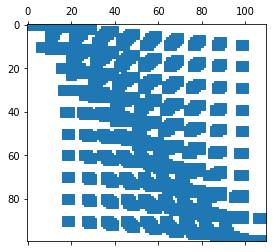

In [82]:
J = tt.fop.jacobian()
pg.show(J)
J.save("jacobian.ijv")